# **Customer Churn prediction using Survival Analysis.**

---





This means a population is being observed for a certain interval of time which is referred to as Survival time. The time period when the observations are started for consideration is called birthtime and the point of time which the observations are stopped  is known as death time. During the period of observation no changes can be seen and there is a high probability that for example the machine will die in future is high this is called censorship.

 Its better than logistic regression. It help to analyse the sitaution or variables mmore effectively where it is a type of regression problem
 When comes to Customer Churn we need to know when the customer will leave the service or stay with the service provided by the company. The factor that influences the time imterval can be age, service,satisfacation,income or death of that person. By analysiing the customer churn bussiness people can make more satisfication offering to the customer to make them to stay with them.This helps the business to gro in billionare.
 First and Foremost in this project we need to analyse the dataset correctly . Understand the data set the variables and type of variables.
 

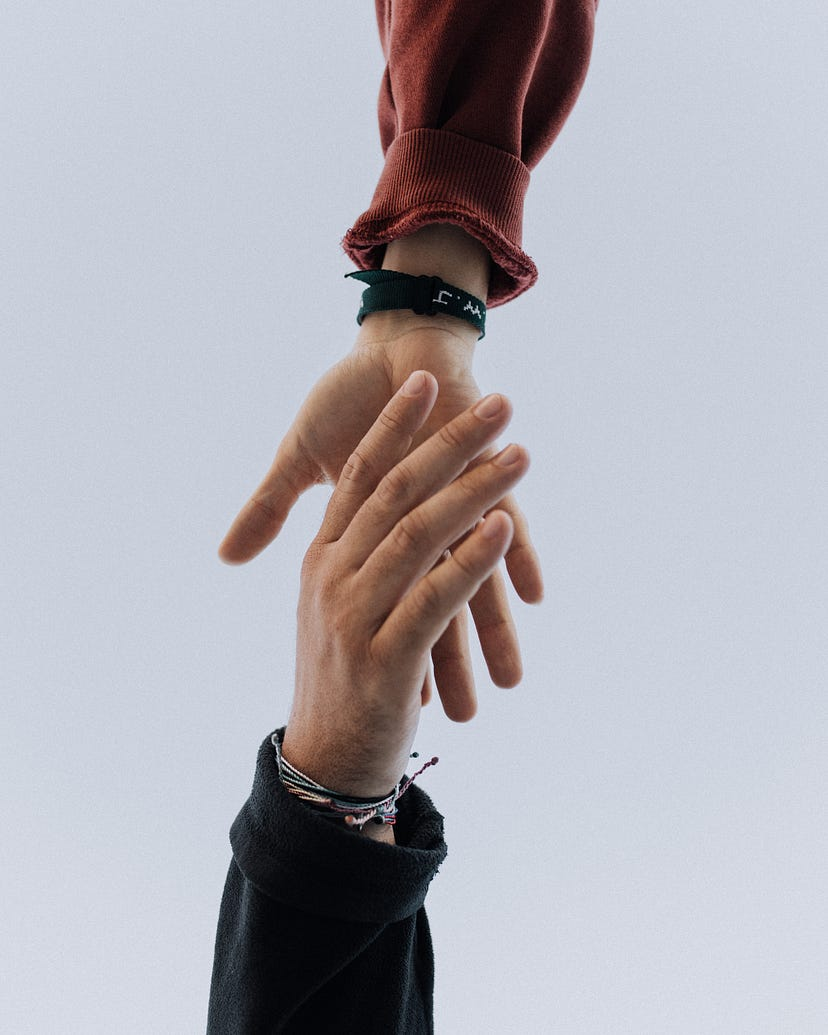

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [5]:
display(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The count is same which indicates that there is no missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* customerID: unique identifier for each customer

* gender: gender of the customer (male or female)

* SeniorCitizen: binary variable indicating if the customer is a senior citizen (1) or not (0)
* Partner: binary variable indicating if the customer has a partner (1) or not (0)

* Dependents: binary variable indicating if the customer has dependents (1) or not (0)

* tenure: the number of months the customer has been with the company

* PhoneService: binary variable indicating if the customer has a phone service (1) or not (0)

* MultipleLines: binary variable indicating if the customer has multiple phone lines (1) or not (0)

* InternetService: type of internet service the customer has (DSL,Fiber optic or not)

* OnlineSecurity: binary variable indicating if the customer has online security (1) or not (0)

* OnlineBackup: binary variable indicating if the customer has online backup (1) or not (0)

* DeviceProtection: binary variable indicating if the customer has device protection (1) or not (0)

* TechSupport: binary variable indicating if the customer has tech support (1) or not (0)

* StreamingTV: binary variable indicating if the customer has streaming TV (1) or not (0)

* StreamingMovies: binary variable indicating if the customer has streaming movies (1) or not (0)

* Contract: the type of contract the customer has (Month-to-month, One year, Two year)

* PaperlessBilling: binary variable indicating if the customer has paperless billing (1) or not (0)

* PaymentMethod: the payment method the customer uses (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

* MonthlyCharges: the monthly charges for the customer

* TotalCharges: the total charges for the customer

* Churn: binary variable indicating if the customer churned (1) or not (0)
From this, we can perform various analyses to gain insights into customer behavior and develop strategies to reduce customer churn. Some potential analyses include:

Exploratory data analysis: examining the distributions and relationships between variables to identify trends and patterns in the data.
Feature engineering: creating new variables or transforming existing ones to improve the predictive power of models.
Churn prediction: using machine learning models to predict which customers are most likely to churn, and identifying the key factors driving churn.









In [8]:
!pip install lifelines

     ------------------------------------ 409.4/409.4 kB 412.0 kB/s eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 355.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 82.3/82.3 kB 242.5 kB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=0c8b1f909509bfc94effe37ae1e18d8120c2731e330987cde22a4282d5e4ad22
  Stored in directory: c:\users\dayana vincent\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import lifelines
import numpy as np
import plotly.express as px

In [10]:
print("The total number of customer in the service:",sum(df["Churn"]=="No"))
print("the total number of customer left the service:",sum(df["Churn"]=="Yes"))

The total number of customer in the service: 5174
the total number of customer left the service: 1869


In [11]:
df["Churn"]=df["Churn"].map({"No":0,"Yes":1})

In [12]:
df.Churn.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Churn', ylabel='count'>

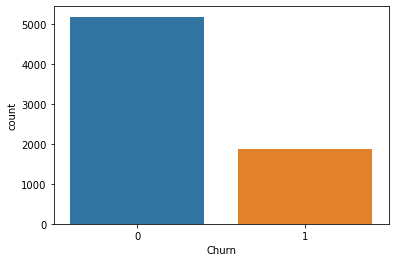

In [13]:
import seaborn as sns
sns.countplot(x=df["Churn"])

<AxesSubplot:xlabel='tenure', ylabel='count'>

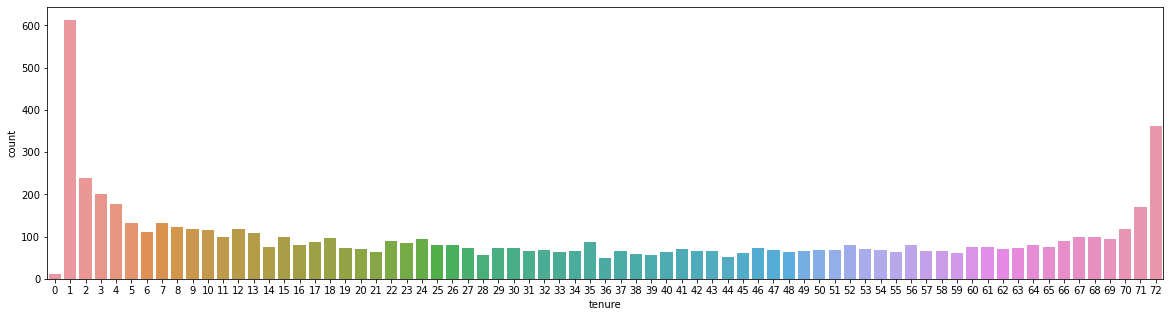

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.countplot(x=df["tenure"])

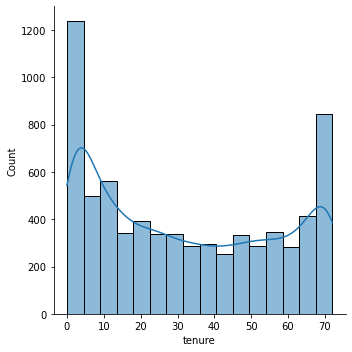

In [15]:
sns.displot(x=df["tenure"],kde=True)

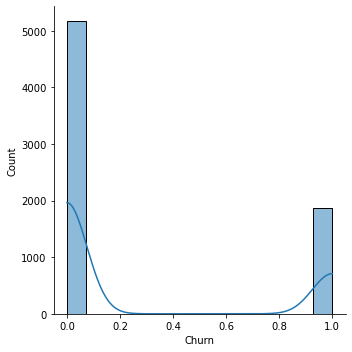

In [16]:
sns.displot(df.Churn,kde=True)

Therefore there are more customers enjoying our service but what's makes the others to quit our service? Does it make a sense  for that we can find out the factors that affect the time interval this can be done using survival analysis.

In [17]:
df.tenure=df.tenure.astype("float")

In [18]:
df.tenure.dtype

dtype('float64')

<AxesSubplot:xlabel='timeline'>

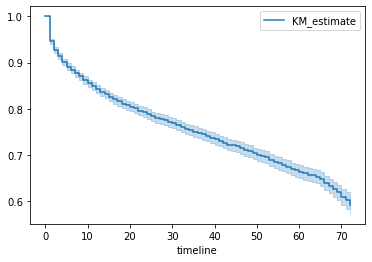

In [19]:
#We need to analyse the tenture and churn variable to know when the customer started experiencing the service.this can be done by survival cure plotting by using Kaplan-Meier estimator.
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(durations = df.tenure, event_observed = df.Churn)
kmf.plot_survival_function()

* This graph indicates that the customer is staying in the service(not churn) in time interval between 0-10 but after that the curve is going done which means that the behaviour of customer changes and he is not satifised with the service provided.It seems that after the survival period there is chance of 60% of customer will not be churn from the service.

* Let us undertsand why the customers are reducing there services from the company by analysis the point of inflextion (point where the curves will decrease suddenly) this helps us to understand the reason why they did may due to price increase or bad service or may more and developing strategies to retain them.

* If there are categorical varibles we can plot KP-ML curves  for each of them and compare those inorder to understand which categories have are more prone to churn.

* Confidence intervals help us determine whether our analysis is reliable or not, and whether the observed differences are statistically significant or due to chance.

Text(0.5, 1.0, 'Survival function')

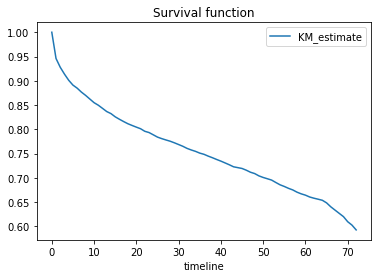

In [20]:
kmf.survival_function_.plot()
plt.title('Survival function')

To examine the effects of different features, we will use the Cox Proportional Hazards Model( Survival Regression model).




In [21]:
features_to_drop = ['customerID', 'gender', 'PhoneService', 'InternetService']

In [22]:
churn_hazard = df.drop(features_to_drop, axis=1).copy()

In [23]:
churn_hazard['TotalCharges'] = pd.to_numeric(churn_hazard['TotalCharges'], errors='coerce')

In [24]:
churn_hazard['TotalCharges'].fillna(0, inplace=True)

In [25]:
binary_features = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV','StreamingMovies', 'PaperlessBilling']
for feat in binary_features:
    churn_hazard[feat] = churn_hazard[feat] == 'Yes'

In [26]:
ohe_features = ['MultipleLines', 'Contract', 'PaymentMethod']
churn_hazard = pd.get_dummies(churn_hazard, 
                              drop_first=True,
                              columns=ohe_features)

In [27]:
cph = lifelines.CoxPHFitter()
cph.fit(churn_hazard, duration_col='tenure', event_col='Churn', show_progress=False)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12688.70
         time fit was run = 2023-05-06 17:50:09 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
SeniorCitizen                           0.03       1.03       0.06            -0.08             0.14                 0.93                 1.16
Partner                                -0.19       0.82       0.06            -0.30            -0.09                 0.74                 0.92
Dependents                             -0.10       0.91       0.07            -0.23             0.04                 0.79                 1.04
OnlineSecurity                         -0.38       0.68       0.07            -0.51            -0.25                 0.60                 0.78
OnlineBackup                           -0.29       0.75       0.06            -0.40            -0.18                 0.67                 0.83
DeviceProtection                       -0.16       0.85       0.06            -0.27            -0.05                 0.76                 0.95
TechSupport                            -0.28       0.76       0.07            -0.41            -0.15                 0.67                 0.86
StreamingTV                            -0.27       0.77       0.06            -0.38            -0.15                 0.68                 0.86
StreamingMovies                        -0.26       0.77       0.06            -0.38            -0.14                 0.69                 0.87
PaperlessBilling                        0.16       1.17       0.06             0.05             0.27                 1.05                 1.31
MonthlyCharges                          0.07       1.07       0.00             0.06             0.07                 1.06                 1.07
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
MultipleLines_No phone service          0.64       1.89       0.12             0.41             0.87                 1.51                 2.38
MultipleLines_Yes                      -0.20       0.82       0.05            -0.30            -0.09                 0.74                 0.91
Contract_One year                      -1.40       0.25       0.10            -1.60            -1.20                 0.20                 0.30
Contract_Two year                      -4.05       0.02       0.20            -4.43            -3.66                 0.01                 0.03
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.18             0.17                 0.83                 1.19
PaymentMethod_Electronic check          0.38       1.46       0.07             0.24             0.52                 1.27                 1.69
PaymentMethod_Mailed check              0.52       1.68       0.09             0.35             0.69                 1.42                 1.99

                                        cmp to      z      p   -log2(p)
covariate                                                              
SeniorCitizen                             0.00   0.60   0.55       0.87
Partner                                   0.00  -3.52 <0.005      11.20
Dependents                                0.00  -1.39   0.17       2.60
OnlineSecurity                            0.00  -5.65 <0.005      25.89
OnlineBackup                              0.00  -5.22 <0.005      22.41
DeviceProtection                          0.00  -2.85 <0.005       7.85
TechSupport                               0.00  -4.19 <

Conclusion after fitting

The total number of observations are above 7000 and Cox PH model is estimate the relationship between the survival time and independent variables.The "exp(coef)" column represents the estimated hazard ratio.

* When a predictor variable has a statistically significant p-value (i.e.,p-value < 0.05), it means that the variable is likely to have a strong relationship with the response variable (in this case, churn) and is important in predicting churn. Therefore, the predictor variables "Partner", "OnlineSecurity", "OnlineBackup", "TechSupport", "StreamingTV", "StreamingMovies", "Contract_One year", "Contract_Two year", "PaymentMethod_Electronic check", and "PaymentMethod_Mailed check" are important variables to consider when predicting churn.

* Variables that have hazard ratios greater than 1 indicate an increased risk of churn, while variables with hazard ratios less than 1 indicate a decreased risk of churn. For example, the "SeniorCitizen" variable has an exp(coef) of 1.03, indicating that being a senior citizen is associated with a 3% increased hazard of churn. On the other hand, the "Contract_Two year" variable has an exp(coef) of 0.02, indicating that having a two-year contract is associated with a 98% decreased hazard of churn.

* The "Concordance" value of 0.93 represents the concordance index, which is a measure of how well the model predicts the relative ordering of survival times. A concordance index of 0.5 indicates a random prediction, while a value of 1.0 indicates perfect prediction. A value of 0.93 indicates a good fit of the model.

* The "Partial AIC" value of 25,415.41 represents the Akaike Information Criterion (AIC), which is a measure of the goodness of fit of the model. The lower the AIC value, the better the model fit. The "log-likelihood ratio test" represents a statistical test of the overall model fit, and the "-log2(p)" column provides the significance level of the test. In this case, the p-value is less than 0.005, indicating that the model is a good fit for the data

Plot the coefficient outputs and their confidence intervals.

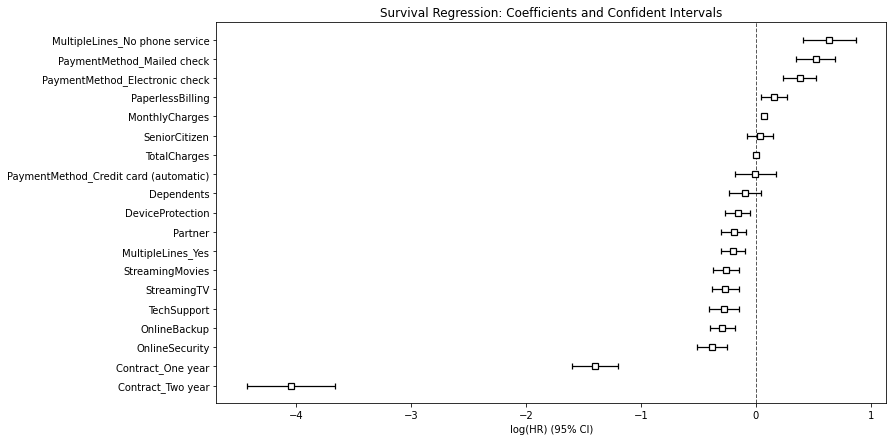

In [28]:
# plotting coefficients
fig_coef, ax_coef = plt.subplots(figsize=(12,7))
ax_coef.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax_coef);

If the confidence interval( represented by a horizontal bar on either side of the point estimate) does not cross the zero line, we can say that the effect of the predictor variable on the hazard of churn is statistically significant at the 0.05 level.

# Contract Specification

In [29]:
df.Contract.values

array(['Month-to-month', 'One year', 'Month-to-month', ...,
       'Month-to-month', 'Month-to-month', 'Two year'], dtype=object)

In [30]:
def specfication(feature,t='tenure',event='Churn',df=df,ax=None):
  for cat in df[feature].unique():
    idx=df[feature]==cat
    kmf = lifelines.KaplanMeierFitter()
    kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
    kmf.plot(ax=None,label=cat)

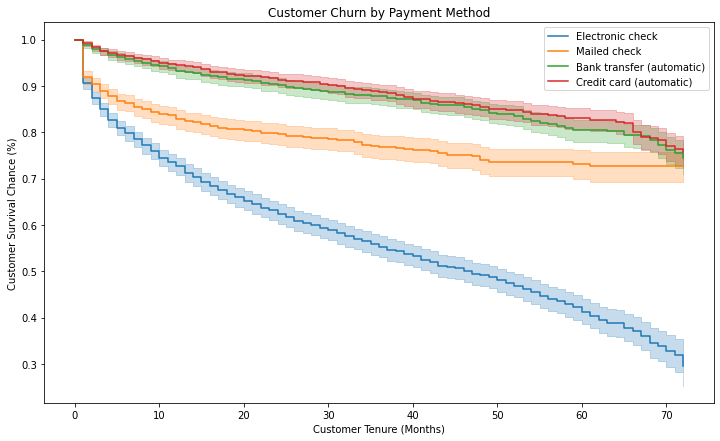

In [31]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
specfication(feature='PaymentMethod',ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Payment Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Chance (%)')
plt.show()

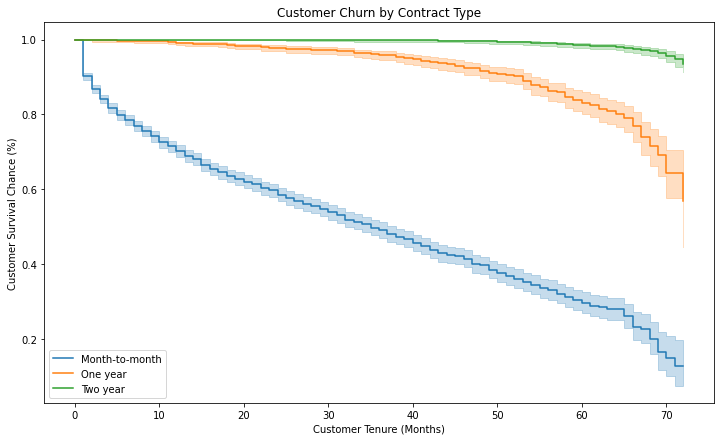

In [32]:
fig_contract, ax_contract = plt.subplots(figsize=(12,7))
specfication(feature='Contract', ax=ax_contract)
ax_contract.set_title('Customer Churn by Contract Type')
ax_contract.set_xlabel('Customer Tenure (Months)')
ax_contract.set_ylabel('Customer Survival Chance (%)')
plt.show()

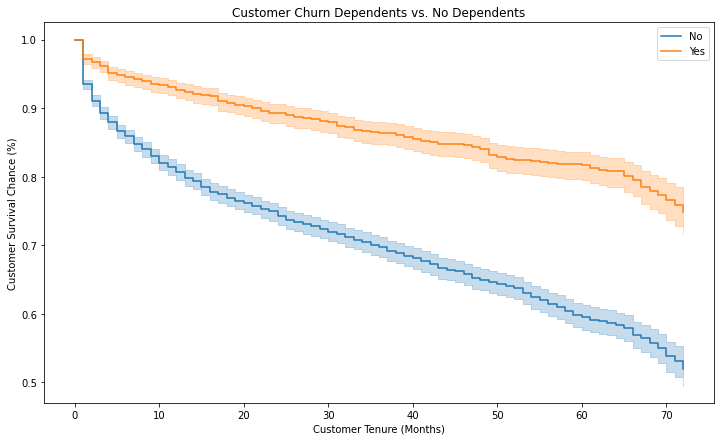

In [33]:
fig_dep, ax_dep = plt.subplots(figsize=(12,7))
specfication(feature='Dependents', ax=ax_dep)
ax_dep.set_title('Customer Churn Dependents vs. No Dependents')
ax_dep.set_xlabel('Customer Tenure (Months)')
ax_dep.set_ylabel('Customer Survival Chance (%)')
plt.show()

coefficient of the "Dependents" variable is -0.1, which corresponds to a hazard ratio of exp(-0.1) = 0.91. This means that customers with dependents are 0.91 times as likely to churn compared to customers without dependents

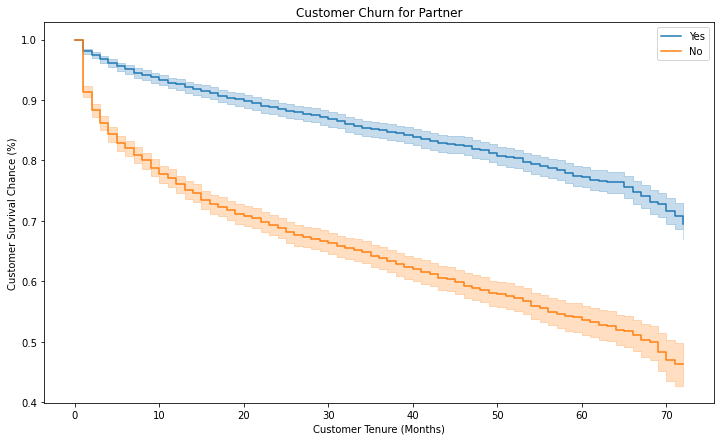

In [34]:
fig_dep, ax_dep = plt.subplots(figsize=(12,7))
specfication(feature='Partner', ax=ax_dep)
ax_dep.set_title('Customer Churn for Partner')
ax_dep.set_xlabel('Customer Tenure (Months)')
ax_dep.set_ylabel('Customer Survival Chance (%)')
plt.show()

 "Partner" variable is -0.2, which corresponds to a hazard ratio of exp(-0.2) = 0.82. This means that customers with a partner are 0.82 times as likely to churn (cancel their subscription) compared to customers without a partner.